In [4]:
import pandas as pd
import numpy as np
file_path = '/Users/z/Desktop/Mathor/数据.xlsx'
df = pd.read_excel(file_path)
df.head()

,台风编号,台风中文名称,台风英文名称,台风起始时间,台风结束时间,当前台风时间,经度,纬度,台风强度,台风等级,风速,气压,移动方向,移动速度,海洋表面温度
0,194501,-,-,1945-04-19T12:00:00,1945-04-26T12:00:00,1945-04-19T12:00:00,160.3,9.5,热带低压(TD),6.0,12.0,0.0,NaN,NaN,28.134395
1,194501,-,-,1945-04-19T12:00:00,1945-04-26T12:00:00,1945-04-19T18:00:00,159.9,9.6,热带低压(TD),7.0,15.0,0.0,NaN,NaN,28.134395
2,194501,-,-,1945-04-19T12:00:00,1945-04-26T12:00:00,1945-04-20T00:00:00,159.7,9.6,热带低压(TD),7.0,17.0,0.0,NaN,NaN,28.156417
3,194501,-,-,1945-04-19T12:00:00,1945-04-26T12:00:00,1945-04-20T06:00:00,159.3,9.7,热带风暴(TS),8.0,20.0,0.0,NaN,NaN,28.156417
4,194501,-,-,1945-04-19T12:00:00,1945-04-26T12:00:00,1945-04-20T12:00:00,158.8,9.8,热带风暴(TS),9.0,23.0,0.0,NaN,NaN,27.948855


In [5]:
# 过滤不符合条件的经纬度数据
df = df[(df['经度'] >= 95 ) & (df['经度'] <= 180) & (df['纬度'] >= 2) & (df['纬度'] <= 58)]
df = df[(df['气压'] > 100 ) & (df['风速'] <= 100)]

In [6]:
import pandas as pd

def convert_direction(direction):
    # 如果移动方向为空，直接返回空
    if pd.isnull(direction):
        return direction
    
    # 创建字符到数值的映射
    char_mapping = {
        '东': '1',
        '南': '2',
        '西': '3',
        '北': '4',
        '偏': '0',  
        'E': '1',
        'S': '2',
        'W': '3',
        'N': '4',
    }
    
    # 初始化转换结果
    converted = ''
    
    # 逐个字符转换，忽略“偏”字
    for char in direction:
        if char in char_mapping:
            converted += char_mapping[char]
    
    # 返回转换后的结果
    return converted

# 应用转换函数
df['移动方向数值'] = df['移动方向'].apply(convert_direction)

# 如果需要将新列放到原列后面
current_direction_index = df.columns.get_loc('移动方向')
df.insert(current_direction_index + 1, '移动方向数值', df.pop('移动方向数值'))

In [7]:
# 假设你要转换的列名为 '台风起始时间', '台风结束时间', '当前台风时间'
df['台风起始时间'] = pd.to_datetime(df['台风起始时间'])
df['台风结束时间'] = pd.to_datetime(df['台风结束时间'])
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'])

In [8]:
# 提取年份
df['年份'] = df['当前台风时间'].dt.year
df['月份'] = df['当前台风时间'].dt.month
# 定义一个函数将经纬度转换为以.5结尾的值
def convert_to_half(value):
    if value % 1 < 0.25:  # 小于 x.25
        return np.floor(value) + 0.5
    elif value % 1 < 0.75:  # 在 x.25 和 x.75 之间
        return np.floor(value) + 0.5
    else:  # 大于等于 x.75
        return np.ceil(value) - 0.5

# 应用函数转换经纬度
df['调整后的经度'] = df['经度'].apply(convert_to_half)
df['调整后的纬度'] = df['纬度'].apply(convert_to_half)

# 根据年份分类
grouped = df.groupby('年份')[['调整后的经度', '调整后的纬度']].apply(lambda x: x.reset_index(drop=True))

# 显示转换后的结果
df

,台风编号,台风中文名称,台风英文名称,台风起始时间,台风结束时间,当前台风时间,经度,纬度,台风强度,台风等级,风速,气压,移动方向,移动方向数值,移动速度,海洋表面温度,年份,月份,调整后的经度,调整后的纬度
594,194601,-,-,1946-03-27 00:00:00,1946-04-07 00:00:00,1946-04-04 12:00:00,120.9,18.1,台风(TY),12.0,33.0,991.5,NaN,NaN,NaN,NaN,1946,4,120.5,18.5
595,194601,-,-,1946-03-27 00:00:00,1946-04-07 00:00:00,1946-04-04 18:00:00,120.4,19.1,台风(TY),12.0,33.0,991.5,NaN,NaN,NaN,27.307248,1946,4,120.5,19.5
596,194601,-,-,1946-03-27 00:00:00,1946-04-07 00:00:00,1946-04-05 00:00:00,120.1,20.0,台风(TY),12.0,33.0,991.5,NaN,NaN,NaN,26.960362,1946,4,120.5,20.5
597,194601,-,-,1946-03-27 00:00:00,1946-04-07 00:00:00,1946-04-05 06:00:00,121.0,21.5,强热带风暴(STS),11.0,30.0,991.5,NaN,NaN,NaN,25.990965,1946,4,121.5,21.5
598,194601,-,-,1946-03-27 00:00:00,1946-04-07 00:00:00,1946-04-05 12:00:00,121.8,22.5,强热带风暴(STS),10.0,28.0,991.5,NaN,NaN,NaN,25.951342,1946,4,121.5,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69125,202317,杰拉华,Jelawat,2023-12-17 08:00:00,2023-12-18 20:00:00,2023-12-18 08:00:00,126.6,7.7,热带风暴(TS),8.0,18.0,1000.0,西西北,334,38.0,NaN,2023,12,126.5,7.5
69126,202317,杰拉华,Jelawat,2023-12-17 08:00:00,2023-12-18 20:00:00,2023-12-18 11:00:00,126.5,7.5,热带风暴(TS),8.0,18.0,1000.0,西西北,334,33.0,NaN,2023,12,126.5,7.5
69127,202317,杰拉华,Jelawat,2023-12-17 08:00:00,2023-12-18 20:00:00,2023-12-18 14:00:00,126.2,7.3,热带低压(TD),7.0,16.0,1002.0,NaN,NaN,NaN,NaN,2023,12,126.5,7.5
69128,202317,杰拉华,Jelawat,2023-12-17 08:00:00,2023-12-18 20:00:00,2023-12-18 17:00:00,125.8,7.4,热带低压(TD),7.0,16.0,1002.0,NaN,NaN,NaN,NaN,2023,12,125.5,7.5


In [9]:
# 替换台风强度中的“超强台风（Super TY）”为“超强台风（SuperTY）”
df['台风强度'] = df['台风强度'].replace('超强台风(Super TY)', '超强台风(SuperTY)')

# 剔除年份为1945的行
df = df[df['年份'] != 1945]

In [10]:
# 计算气压值不为0的平均值
pressure_mean = df.loc[df['气压'] != 0, '气压'].mean()
# 使用 loc 来进行替换，以避免警告
df.loc[df['气压'] == 0, '气压'] = pressure_mean

In [11]:
# 检查每列的空值数量
missing_data = df.isnull().sum()
# 显示每列的空值情况
print("每列的空值数量：")
print(missing_data)

每列的空值数量：
台风编号          0
台风中文名称       36
台风英文名称       39
台风起始时间        0
台风结束时间        0
当前台风时间        0
经度            0
纬度            0
台风强度       5559
台风等级          0
风速            0
气压            0
移动方向      46006
移动方向数值    46006
移动速度      45566
海洋表面温度     6346
年份            0
月份            0
调整后的经度        0
调整后的纬度        0
dtype: int64


In [12]:
# 查看台风强度的唯一类别
unique_intensity_categories = df['台风强度'].unique()

print("台风强度的唯一类别：")
print(unique_intensity_categories)

台风强度的唯一类别：
['台风(TY)' '强热带风暴(STS)' '热带风暴(TS)' '热带低压(TD)' '强台风(STY)' '超强台风(SuperTY)'
 nan]


In [13]:
import pandas as pd

# 假设 df 是你的 DataFrame，且风速列名为 '风速'
# 定义风速的区间和对应的台风强度类别
bins = [-1, 10.8, 17.1, 24.4, 32.6, 41.4, 50.9, float('inf')]
labels = ['弱热带低压或未知', '热带低压（TD）', '热带风暴（TS）', '强热带风暴（STS）', '台风（TY）', '强台风（STY）', '超强台风（SuperTY）']

# 仅针对“台风强度”为 NaN 且“风速”不为空或不为零的行进行分类
mask = df['台风强度'].isnull() & (df['风速'].notnull() & (df['风速'] > 0))

# 使用 cut() 方法根据风速分类
df.loc[mask, '台风强度'] = pd.cut(df.loc[mask, '风速'], bins=bins, labels=labels)

In [14]:
# 查看更新后的台风强度类别
print("填补后的台风强度类别：")
print(df['台风强度'].value_counts())

填补后的台风强度类别：
台风强度
热带风暴(TS)         15205
强热带风暴(STS)       13423
台风(TY)           11650
热带低压(TD)          9889
强台风(STY)          6627
超强台风(SuperTY)     4947
弱热带低压或未知          2375
Name: count, dtype: int64


In [15]:
# 对海洋表面温度的空缺值进行插值填补
df['海洋表面温度'] = df['海洋表面温度'].interpolate(method='linear')

# 如果想使用其他插值方法，比如时间插值(需要时间索引)可以使用：
 #df['海洋表面温度'] = df['海洋表面温度'].interpolate(method='time')
df['气压'] = df['气压'].interpolate(method='linear')# 对气压的空缺值进行线性插值
# 通过布尔条件剔除台风强度和风速均为零或空值的行
df = df[~((df['台风强度'].isnull() | (df['台风强度'] == 0)) & 
           (df['风速'].isnull() | (df['风速'] == 0)))]

In [16]:
# 检查每列的空值数量
missing_data = df.isnull().sum()

# 显示每列的空值情况
print("每列的空值数量：")
print(missing_data)

每列的空值数量：
台风编号          0
台风中文名称       36
台风英文名称       39
台风起始时间        0
台风结束时间        0
当前台风时间        0
经度            0
纬度            0
台风强度          0
台风等级          0
风速            0
气压            0
移动方向      42824
移动方向数值    42824
移动速度      42385
海洋表面温度        1
年份            0
月份            0
调整后的经度        0
调整后的纬度        0
dtype: int64


In [17]:
# 创建台风强度的映射
typhoon_intensity_mapping = {
    '弱热带低压或未知': 0,
    '热带低压(TD)': 1,
    '热带风暴(TS)': 2,
    '强热带风暴(STS)': 3,
    '台风(TY)': 4,
    '强台风(STY)': 5,
    '超强台风(SuperTY)': 6,
}

# 将台风强度列转换为数值并保留原列
df['台风强度数值'] = df['台风强度'].map(typhoon_intensity_mapping)
current_intensity_index = df.columns.get_loc('台风强度')
df.insert(current_intensity_index + 1, '台风强度数值', df.pop('台风强度数值'))

In [18]:
# 将时间格式化为所需的字符串格式
df['格式化时间'] = df['当前台风时间'].dt.strftime('%Y%m%d%H')
# 获取 '当前台风时间' 的列索引
current_time_index = df.columns.get_loc('当前台风时间')

# 将 '格式化时间' 列插入到 '当前台风时间' 的后面
df.insert(current_time_index + 1, '格式化时间', df.pop('格式化时间'))

Epoch 1/100


C:\Users\z\AppData\Local\Temp\ipykernel_26900\3592952788.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, '时间步长'] = (filtered_df['当前台风时间'] - filtered_df['当前台风时间'].min()).dt.total_seconds() / 21600  # 每6小时一次，转换为时间步长
C:\Users\z\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1182/1182 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0162 - val_loss: 0.0036
Epoch 2/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0048 - val_loss: 0.0026
Epoch 3/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 4/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 5/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 6/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 7/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 8/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 9/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 10/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 11/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 12/100
1182/1182 ━━━━━━━━

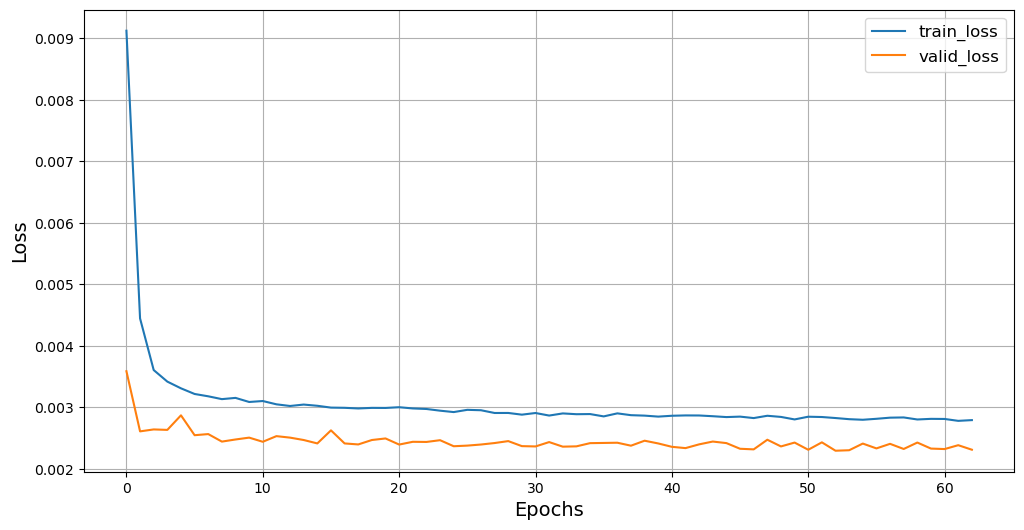

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error

# 筛选1970到2020年的数据
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'])
filtered_df = df[(df['当前台风时间'].dt.year >= 1970) & (df['当前台风时间'].dt.year <= 2020)]

# 转换时间为步长，并将其加入到特征中
filtered_df.loc[:, '时间步长'] = (filtered_df['当前台风时间'] - filtered_df['当前台风时间'].min()).dt.total_seconds() / 21600  # 每6小时一次，转换为时间步长

# 使用经度、纬度和时间步长作为输入
data = filtered_df[['经度', '纬度', '时间步长']].values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 0])  # 假设目标是第一个特征（如经度）
    return np.array(X), np.array(y)

# 创建输入数据集
X, y = create_dataset(data, time_step=10)

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 固定超参数
learning_rate = 0.001
dropout_rate = 0.3
batch_size = 32
epochs = 100

# 创建LSTM模型
def create_lstm_model(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # 假设只预测经度

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 创建并训练模型
model = create_lstm_model(learning_rate, dropout_rate)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), 
                    callbacks=[EarlyStopping(patience=10)])

# 使用模型对测试集进行预测
y_pred = model.predict(X_test)


# 计算评估指标
mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
r2 = r2_score(y_test_unscaled, predictions_unscaled)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")



# 绘制损失曲线
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='valid_loss')
#plt.title('LSTM模型损失曲线', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("LSTM模型经度损失曲线.png", format="png", dpi=600, bbox_inches='tight')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


C:\Users\z\AppData\Local\Temp\ipykernel_26900\1661761774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typhoon_sanba_2023['时间步长'] = (typhoon_sanba_2023['当前台风时间'] - filtered_df['当前台风时间'].min()).dt.total_seconds() / 21600  # 每6小时一个步长


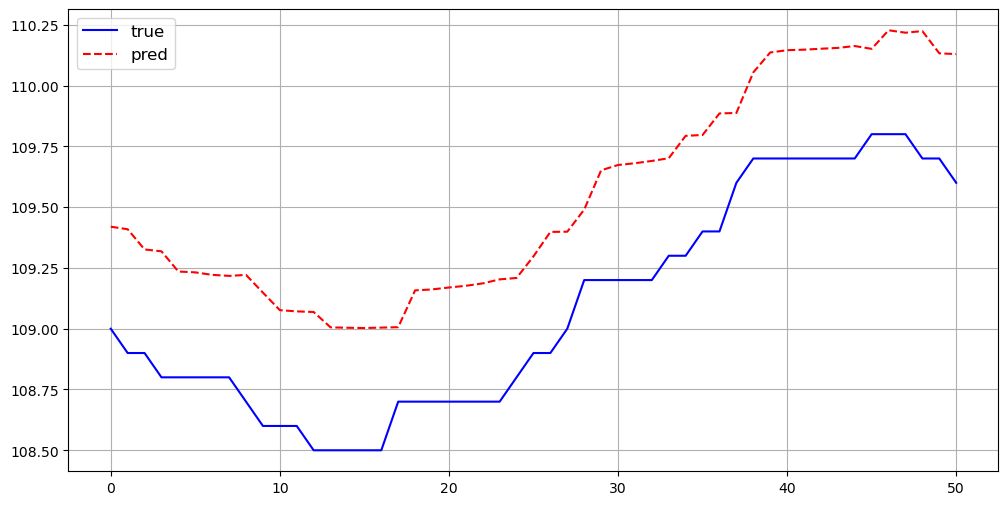

In [20]:
# 筛选2023年台风三巴的数据
typhoon_sanba_2023 = df[(df['当前台风时间'].dt.year == 2023) & (df['台风中文名称'] == '三巴')]

# 转换时间为步长，并加入到特征中
typhoon_sanba_2023['时间步长'] = (typhoon_sanba_2023['当前台风时间'] - filtered_df['当前台风时间'].min()).dt.total_seconds() / 21600  # 每6小时一个步长

# 获取经度、纬度、时间步长数据
data_sanba_2023 = typhoon_sanba_2023[['经度', '纬度', '时间步长']].values
data_sanba_2023 = scaler.transform(data_sanba_2023)  # 使用先前的Scaler归一化

# 准备输入数据
time_step = 10  # 根据你的模型设置
X_sanba_2023, y_sanba_2023 = create_dataset(data_sanba_2023, time_step=time_step)

# 预测
pred_sanba_2023 = model.predict(X_sanba_2023)

# 反归一化预测结果和实际值
pred_sanba_2023_unscaled = scaler.inverse_transform(np.concatenate([pred_sanba_2023, np.zeros((pred_sanba_2023.shape[0], 2))], axis=1))[:, 0]
y_sanba_2023_unscaled = scaler.inverse_transform(np.concatenate([y_sanba_2023.reshape(-1, 1), np.zeros((y_sanba_2023.shape[0], 2))], axis=1))[:, 0]

# 绘制实际值和预测值对比图
plt.figure(figsize=(12, 6))
plt.plot(y_sanba_2023_unscaled, label="true", linestyle='-', color='b')
plt.plot(pred_sanba_2023_unscaled, label="pred", linestyle='--', color='r')
#plt.title('2023年台风三巴经度预测与实际值对比', fontsize=16)
#plt.xlabel('时间步长 (每步6小时)', fontsize=14)
#plt.ylabel('经度', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("2023年台风三巴经度预测与实际值对比.png", format="png", dpi=600, bbox_inches='tight')
plt.show()

Epoch 1/100


C:\Users\z\AppData\Local\Temp\ipykernel_26900\2276002921.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, '时间步长'] = (filtered_df['当前台风时间'] - filtered_df['当前台风时间'].min()).dt.total_seconds() / 21600  # 每6小时一次，转换为时间步长
C:\Users\z\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1182/1182 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0123 - val_loss: 0.0031
Epoch 2/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0040 - val_loss: 0.0026
Epoch 3/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 4/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 5/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 6/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 7/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 8/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 9/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 10/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 11/100
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 12/100
1182/1182 ━━━━━━━━

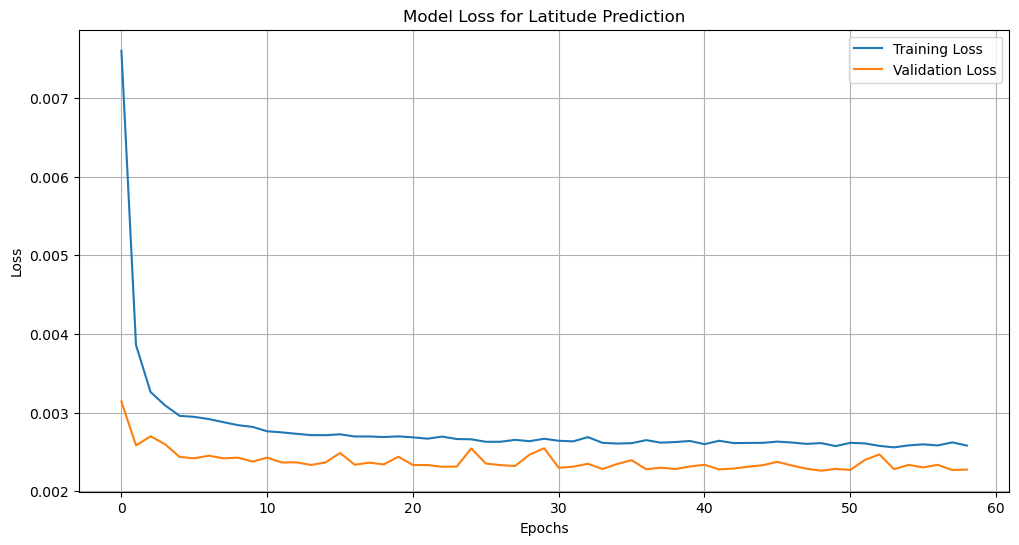

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# 1. 筛选1970到2020年的数据
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'])
filtered_df = df[(df['当前台风时间'].dt.year >= 1970) & (df['当前台风时间'].dt.year <= 2020)]

# 转换时间为步长，并将其加入到特征中
filtered_df.loc[:, '时间步长'] = (filtered_df['当前台风时间'] - filtered_df['当前台风时间'].min()).dt.total_seconds() / 21600  # 每6小时一次，转换为时间步长

# 使用经度、纬度和时间步长作为输入
data = filtered_df[['经度', '纬度', '时间步长']].values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# 2. 创建输入数据集，用于预测纬度
def create_dataset_latitude(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 1])  # 目标是第二个特征（纬度）
    return np.array(X), np.array(y)

# 创建输入数据集
X_latitude, y_latitude = create_dataset_latitude(data, time_step=10)

# 数据分割
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X_latitude, y_latitude, test_size=0.2, random_state=42)
# 3. 创建LSTM模型
def create_lstm_model_latitude(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lat.shape[1], X_train_lat.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # 假设只预测纬度

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
# 固定超参数
learning_rate = 0.001
dropout_rate = 0.3
batch_size = 32
epochs = 100
# 训练模型
model_latitude = create_lstm_model_latitude(learning_rate, dropout_rate)
history_latitude = model_latitude.fit(X_train_lat, y_train_lat, epochs=epochs, batch_size=batch_size, 
                                       validation_data=(X_test_lat, y_test_lat), 
                                       callbacks=[EarlyStopping(patience=10)])
# 计算预测值并计算均方误差
y_pred_latitude = model_latitude.predict(X_test_lat)
# 计算评估指标
mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
r2 = r2_score(y_test_unscaled, predictions_unscaled)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# 4. 绘制损失曲线
plt.figure(figsize=(12, 6))
plt.plot(history_latitude.history['loss'], label='Training Loss')
plt.plot(history_latitude.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for Latitude Prediction')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.savefig("纬度预测损失曲线.png", format="png", dpi=600, bbox_inches='tight')
plt.show()


In [64]:
# 1. 筛选2023年三巴台风的数据
typhoon_sanba_2023 = df[(df['当前台风时间'].dt.year == 2023) & (df['台风中文名称'] == '三巴')]
typhoon_sanba_2023['时间步长'] = (typhoon_sanba_2023['当前台风时间'] - filtered_df['当前台风时间'].min()).dt.total_seconds() / 21600  # 每6小时一个步长
# 2. 获取经度、纬度和时间步长数据并进行归一化
data_sanba_2023 = typhoon_sanba_2023[['经度', '纬度', '时间步长']].values
data_sanba_2023 = scaler.transform(data_sanba_2023)
# 准备输入数据
X_sanba_2023, y_sanba_2023 = create_dataset_latitude(data_sanba_2023, time_step=10)  # 只需要输入数据
# 3. 进行预测
pred_sanba_latitude = model_latitude.predict(X_sanba_2023)
print("pred_sanba_latitude shape:", pred_sanba_latitude.shape)
print("pred_sanba_latitude values:", pred_sanba_latitude)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
pred_sanba_latitude shape: (51, 1)
pred_sanba_latitude values: [[0.2828841 ]
 [0.28407356]
 [0.28535694]
 [0.28684318]
 [0.28839645]
 [0.28997377]
 [0.28989258]
 [0.289711  ]
 [0.291255  ]
 [0.2929678 ]
 [0.29463938]
 [0.29458594]
 [0.29440096]
 [0.2975814 ]
 [0.2994061 ]
 [0.30103406]
 [0.30259228]
 [0.30416024]
 [0.30577022]
 [0.30739626]
 [0.3090218 ]
 [0.3106281 ]
 [0.31222206]
 [0.31546694]
 [0.31717977]
 [0.32037985]
 [0.32700443]
 [0.32892284]
 [0.3319627 ]
 [0.3334698 ]
 [0.33659217]
 [0.33659512]
 [0.33633626]
 [0.33611527]
 [0.33764628]
 [0.3377473 ]
 [0.33935767]
 [0.33944142]
 [0.34103525]
 [0.34114048]
 [0.34112716]
 [0.33944318]
 [0.33764705]
 [0.33590487]
 [0.33587986]
 [0.33273533]
 [0.3309828 ]
 [0.32773772]
 [0.32771823]
 [0.32466233]
 [0.3229675 ]]


C:\Users\z\AppData\Local\Temp\ipykernel_26900\2863872086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typhoon_sanba_2023['时间步长'] = (typhoon_sanba_2023['当前台风时间'] - filtered_df['当前台风时间'].min()).dt.total_seconds() / 21600  # 每6小时一个步长


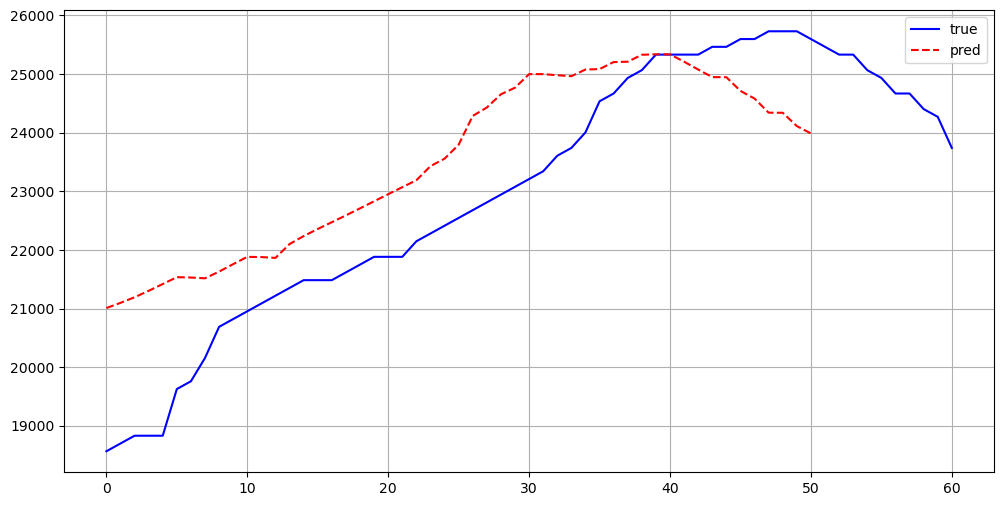

In [66]:
# 反归一化预测结果和实际值（恢复为纬度的原始尺度）
# 逆缩放预测的纬度
# 确保 pred_sanba_latitude 是一维数组
pred_sanba_latitude_unscaled = scaler.inverse_transform(
    np.concatenate(
        [np.zeros((pred_sanba_latitude.shape[0], 2)), pred_sanba_latitude.reshape(-1, 1)],
        axis=1
    )
)[:, 2]  # 获取对应的纬度列
y_sanba_latitude_unscaled = scaler.inverse_transform(np.concatenate([np.zeros((data_sanba_2023.shape[0], 2)), data_sanba_2023[:, 1:2]], axis=1))[:, 2]
# 4. 绘制实际值和预测值对比图
plt.figure(figsize=(12, 6))
plt.plot(y_sanba_latitude_unscaled, label="true", color='blue')
plt.plot(pred_sanba_latitude_unscaled, label="pred", color='red', linestyle='--')
#plt.title('Predicted vs Actual Latitude for Typhoon Sanba (2023)')
#plt.xlabel('Time Steps')
#plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.savefig("2023年三巴台风纬度预测与实际值对比.png", format="png", dpi=600, bbox_inches='tight')
plt.show()


C:\Users\z\AppData\Local\Temp\ipykernel_26900\2984244268.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['时间步长'] = (filtered_df['当前台风时间'] - filtered_df['当前台风时间'].min()).dt.total_seconds() / 21600  # 每6小时一次


Best score: 0.9228876010343372
Best parameters: {'model__units': 100, 'model__dropout_rate': 0.3, 'epochs': 100, 'batch_size': 64}
Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1652 - val_loss: 0.0044
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0235 - val_loss: 0.0031
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0141 - val_loss: 0.0028
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0108 - val_loss: 0.0025
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0081 - val_loss: 0.0023
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0071 - val_loss: 0.0022
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064 - val_loss: 0.0023
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0055 - val_loss: 0.0021
Epoch 9/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0051 - val_loss: 0.0022
Epoch 10/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0052 - val_loss: 0.002

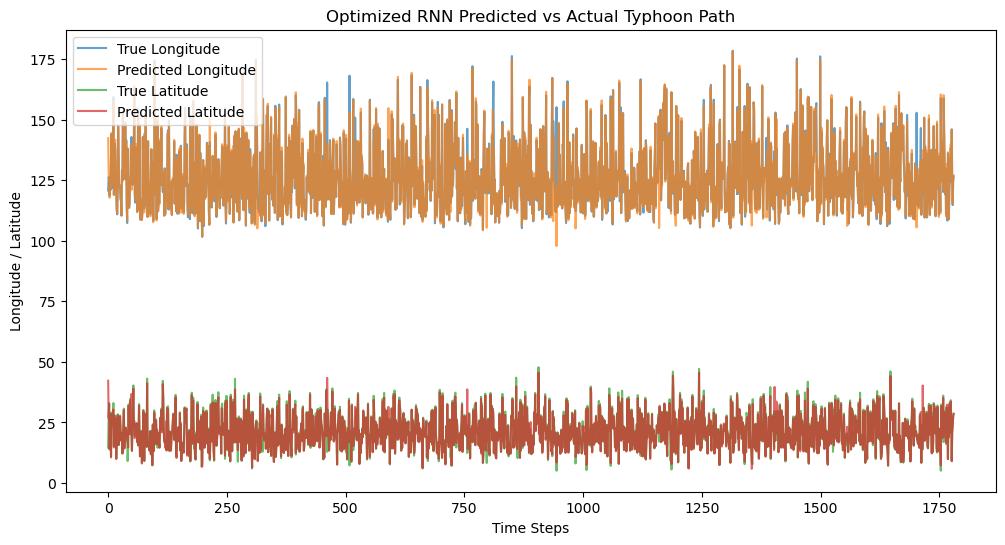

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 假设 df 是已经加载的数据集
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'])
filtered_df = df[(df['当前台风时间'].dt.year >= 2015) & (df['当前台风时间'].dt.year <= 2020)]

# 转换时间为步长，并将其加入到特征中
filtered_df['时间步长'] = (filtered_df['当前台风时间'] - filtered_df['当前台风时间'].min()).dt.total_seconds() / 21600  # 每6小时一次

# 使用经度、纬度和时间步长作为输入
data = filtered_df[['经度', '纬度', '时间步长']].values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# 创建数据集
def create_dataset(data, time_step=20):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, :2])  # 假设目标是经度和纬度
    return np.array(X), np.array(y)

X, y = create_dataset(data, time_step=20)

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建RNN模型
def create_rnn_model(units=50, dropout_rate=0.3):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(SimpleRNN(units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(SimpleRNN(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2))  # 输出经度和纬度
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 使用KerasRegressor封装模型
model = KerasRegressor(model=create_rnn_model, verbose=0)

# 定义超参数范围
param_distributions = {
    'model__units': [50, 100],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

# 使用RandomizedSearchCV进行超参数优化
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, cv=3, n_iter=5)
grid_result = random_search.fit(X_train, y_train)

# 输出最佳参数
print(f"Best score: {grid_result.best_score_}")
print(f"Best parameters: {grid_result.best_params_}")

# 使用最佳参数训练模型
best_params = grid_result.best_params_
best_model = create_rnn_model(units=best_params['model__units'], dropout_rate=best_params['model__dropout_rate'])
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=10)])

# 进行预测
predictions = best_model.predict(X_test)

# 反归一化预测结果和实际值
predictions_unscaled = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], 1))], axis=1))[:, :2]
y_test_unscaled = scaler.inverse_transform(np.concatenate([y_test, np.zeros((y_test.shape[0], 1))], axis=1))[:, :2]

# 计算评估指标
mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
r2 = r2_score(y_test_unscaled, predictions_unscaled)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# 绘制预测结果与实际值的对比图
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled[:, 0], label="True Longitude", alpha=0.7)
plt.plot(predictions_unscaled[:, 0], label="Predicted Longitude", alpha=0.7)
plt.plot(y_test_unscaled[:, 1], label="True Latitude", alpha=0.7)
plt.plot(predictions_unscaled[:, 1], label="Predicted Latitude", alpha=0.7)
plt.title("Optimized RNN Predicted vs Actual Typhoon Path")
plt.xlabel("Time Steps")
plt.ylabel("Longitude / Latitude")
plt.legend()
plt.savefig("优化后的RNN预测与实际台风路径对比.png", format="png", dpi=600, bbox_inches='tight')
plt.show()